In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cardekho_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

# Explore the dataset
print(df.head())

   S_no       car_name    brand     model  vehicle_age  km_driven seller_type  \
0     0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1     1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2     2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3     3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4     4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4        

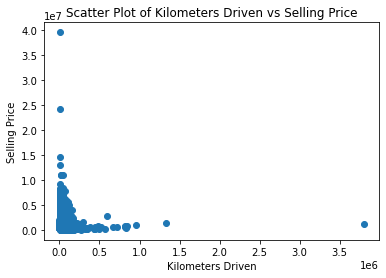

In [7]:
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Kilometers Driven vs Selling Price')
plt.show()

Text(0, 0.5, 'Selling Price')

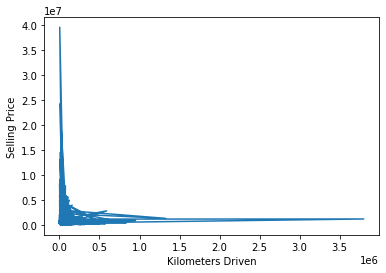

In [9]:
plt.plot(df['km_driven'], df['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

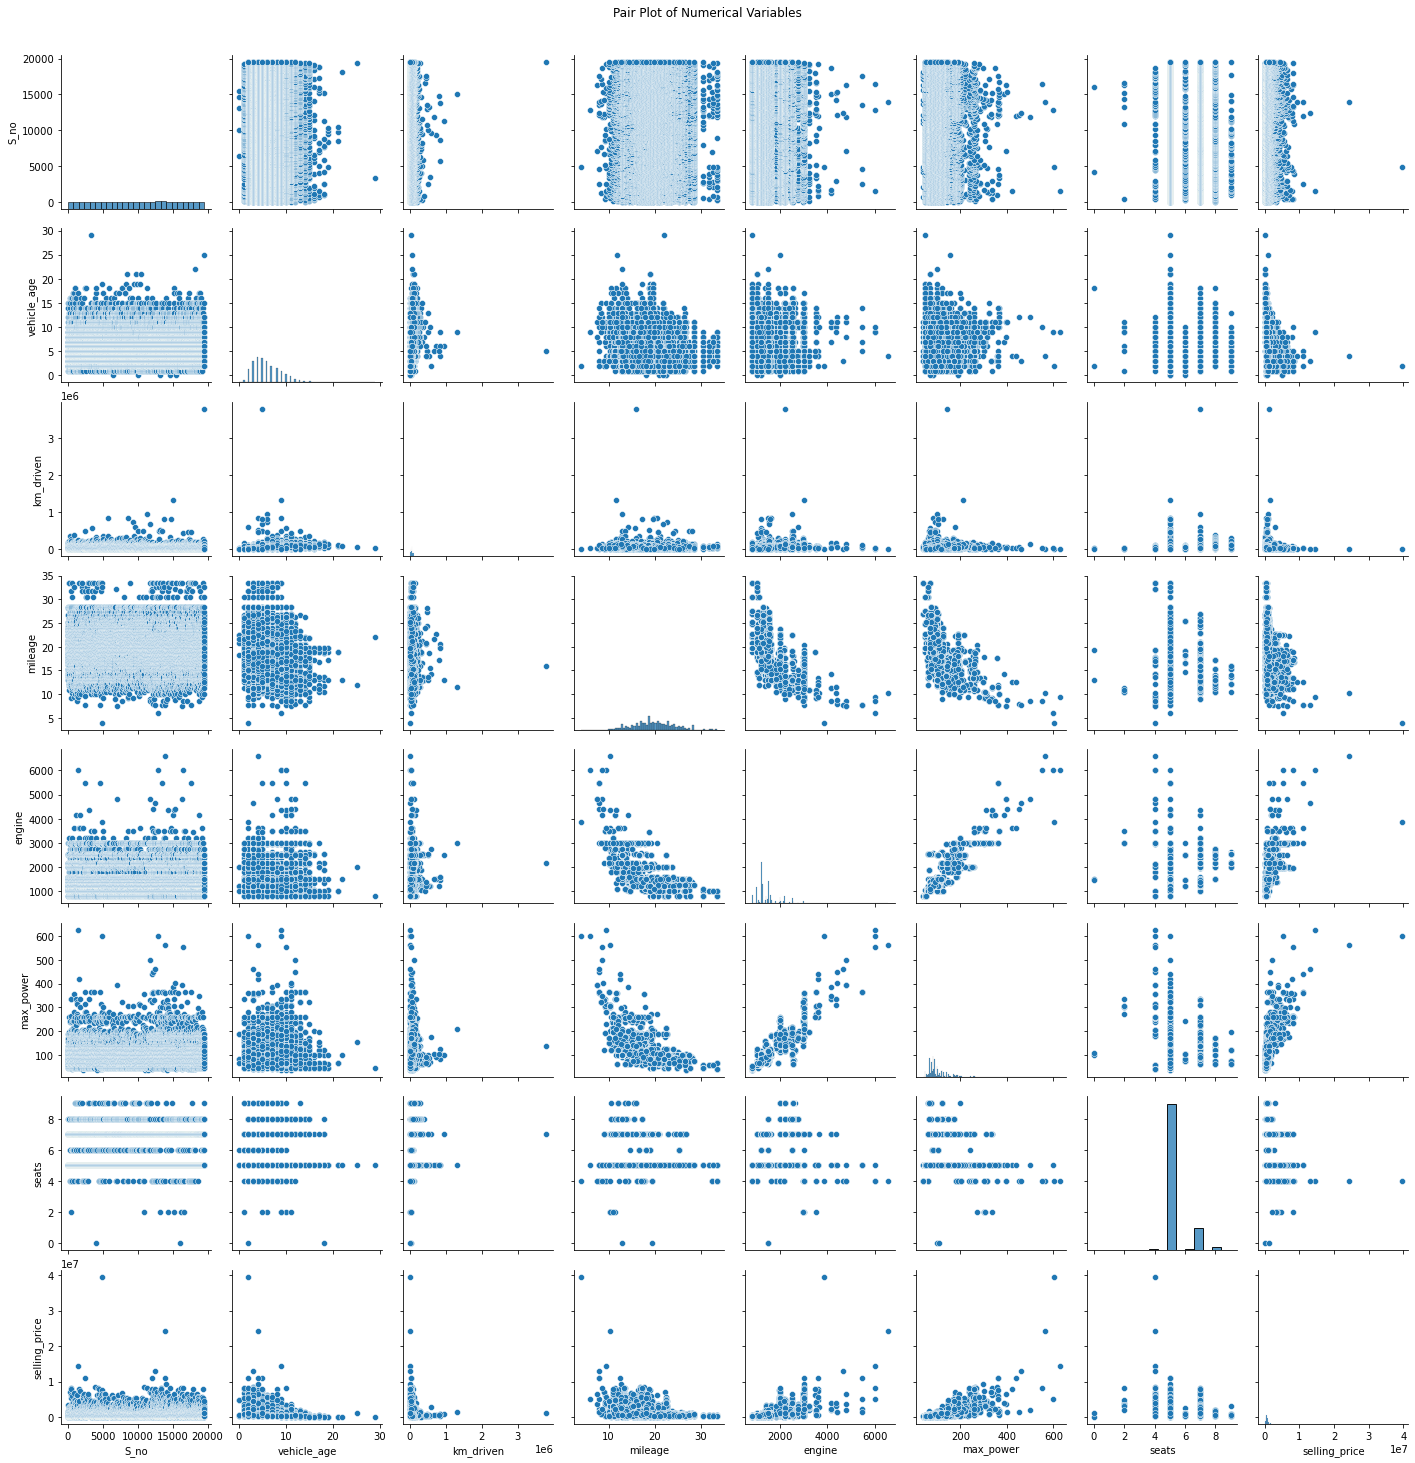

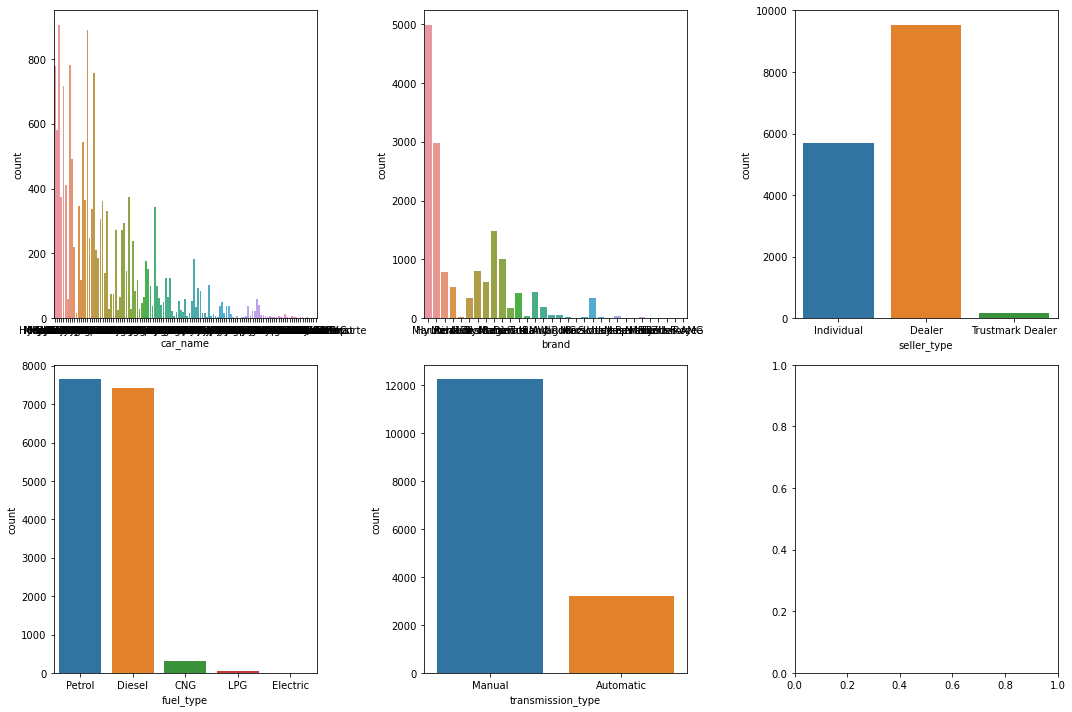

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
your_dataset = df


# Pairplot for numerical variables
sns.pairplot(data=df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Count plots for categorical variables
categorical_vars = ['car_name', 'brand', 'seller_type', 'fuel_type', 'transmission_type']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    sns.countplot(x=var, data=your_dataset, ax=axes[row, col])

plt.tight_layout()
plt.show()



In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import joblib  # Import joblib for model and encoder persistence

# Assuming 'your_dataset' is your original dataset
# Load your dataset as a DataFrame
data = pd.read_csv('cardekho_dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Create a copy of the DataFrame
data_copy = data.copy()

# Select relevant columns
data_copy = data_copy[['brand', 'model', 'vehicle_age', 'km_driven', 'fuel_type', 'transmission_type', 'selling_price']]

# Initialize LabelEncoders
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()

# Fit and transform the training data
data_copy['brand'] = brand_encoder.fit_transform(data_copy['brand'])
data_copy['model'] = model_encoder.fit_transform(data_copy['model'])
data_copy['fuel_type'] = fuel_type_encoder.fit_transform(data_copy['fuel_type'])
data_copy['transmission_type'] = transmission_encoder.fit_transform(data_copy['transmission_type'])

# Split the data into features and target
X = data_copy.drop('selling_price', axis=1)
y = data_copy['selling_price']

# Train a simple model (you should use your own trained model)
model = RandomForestRegressor()
model.fit(X, y)

# Save the model and encoders for future use
joblib.dump(model, 'your_model.joblib')
joblib.dump(brand_encoder, 'brand_encoder.joblib')
joblib.dump(model_encoder, 'model_encoder.joblib')
joblib.dump(fuel_type_encoder, 'fuel_type_encoder.joblib')
joblib.dump(transmission_encoder, 'transmission_encoder.joblib')

def predict_price(user_brand, user_model, user_age, user_km_driven, user_fuel_type, user_transmission):
    # Load the saved encoders
    brand_encoder = joblib.load('brand_encoder.joblib')
    model_encoder = joblib.load('model_encoder.joblib')
    fuel_type_encoder = joblib.load('fuel_type_encoder.joblib')
    transmission_encoder = joblib.load('transmission_encoder.joblib')

    # Preprocess user input
    user_brand_transformed = brand_encoder.transform([user_brand])[0]
    user_model_transformed = model_encoder.transform([user_model])[0]
    user_fuel_type_transformed = fuel_type_encoder.transform([user_fuel_type])[0]
    user_transmission_transformed = transmission_encoder.transform([user_transmission])[0]

    # Make prediction
    input_data = pd.DataFrame({'brand': [user_brand_transformed],
                               'model': [user_model_transformed],
                               'vehicle_age': [user_age],
                               'km_driven': [user_km_driven],
                               'fuel_type': [user_fuel_type_transformed],
                               'transmission_type': [user_transmission_transformed]})

    predicted_price = model.predict(input_data)[0]
    return predicted_price

# Example usage
user_brand = input("Enter car brand: ")
user_model = input("Enter car model: ")
user_age = float(input("Enter vehicle age: "))
user_km_driven = float(input("Enter kilometers driven: "))
user_fuel_type = input("Enter fuel type: ")
user_transmission = input("Enter transmission type: ")

predicted_price = predict_price(user_brand, user_model, user_age, user_km_driven, user_fuel_type, user_transmission)
print(f"Predicted Price: Rupees {np.round(predicted_price, 2)}")


Predicted Price: Rupees 2077020.0


accuracy


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Assuming 'your_dataset' is your original dataset
# Load your dataset as a DataFrame
data = pd.read_csv('cardekho_dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Select relevant columns
data_copy = data[['brand', 'model', 'vehicle_age', 'km_driven', 'fuel_type', 'transmission_type', 'selling_price']]

# Create a deep copy of the DataFrame
data_copy = data_copy.copy()

# Initialize LabelEncoders
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()

# Use .loc to explicitly modify the original DataFrame
data_copy.loc[:, 'brand'] = brand_encoder.fit_transform(data_copy['brand'])
data_copy.loc[:, 'model'] = model_encoder.fit_transform(data_copy['model'])
data_copy.loc[:, 'fuel_type'] = fuel_type_encoder.fit_transform(data_copy['fuel_type'])
data_copy.loc[:, 'transmission_type'] = transmission_encoder.fit_transform(data_copy['transmission_type'])

# Split the data into features and target
X = data_copy.drop('selling_price', axis=1)
y = data_copy['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (you should use your own trained model)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Save the model and encoders for future use
joblib.dump(model, 'your_model.joblib')
joblib.dump(brand_encoder, 'brand_encoder.joblib')
joblib.dump(model_encoder, 'model_encoder.joblib')
joblib.dump(fuel_type_encoder, 'fuel_type_encoder.joblib')
joblib.dump(transmission_encoder, 'transmission_encoder.joblib')


Mean Squared Error: 77456821325.4045


['transmission_encoder.joblib']

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

# Assuming 'your_dataset' is your original dataset
# Load your dataset as a DataFrame
data = pd.read_csv('cardekho_dataset.csv')  # Replace 'your_dataset.csv' with your actual file path

# Select relevant columns
data_copy = data[['brand', 'model', 'vehicle_age', 'km_driven', 'fuel_type', 'transmission_type', 'selling_price']]

# Create a deep copy of the DataFrame
data_copy = data_copy.copy()

# Initialize LabelEncoders
brand_encoder = LabelEncoder()
model_encoder = LabelEncoder()
fuel_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()

# Use .loc to explicitly modify the original DataFrame
data_copy.loc[:, 'brand'] = brand_encoder.fit_transform(data_copy['brand'])
data_copy.loc[:, 'model'] = model_encoder.fit_transform(data_copy['model'])
data_copy.loc[:, 'fuel_type'] = fuel_type_encoder.fit_transform(data_copy['fuel_type'])
data_copy.loc[:, 'transmission_type'] = transmission_encoder.fit_transform(data_copy['transmission_type'])

# Split the data into features and target
X = data_copy.drop('selling_price', axis=1)
y = data_copy['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (you should use your own trained model)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Convert R-squared to accuracy percentage
accuracy_percentage = r_squared * 100

print(f"R-squared (Accuracy): {accuracy_percentage:.2f}%")

# Save the model and encoders for future use
joblib.dump(model, 'your_model.joblib')
joblib.dump(brand_encoder, 'brand_encoder.joblib')
joblib.dump(model_encoder, 'model_encoder.joblib')
joblib.dump(fuel_type_encoder, 'fuel_type_encoder.joblib')
joblib.dump(transmission_encoder, 'transmission_encoder.joblib')


R-squared (Accuracy): 89.53%


['transmission_encoder.joblib']